### Descargar imágenes

In [1]:
# import os
# if os.path.exists('Imagenes'):   
#     print ('La carpeta ya existe')
# else:
#     os.system('wget -nc https://www.dropbox.com/s/i80af08mp0y5ux5/Imagenes.zip?dl=1')
#     os.system('unzip Imagenes.zip?dl=1')
#     os.system('rm -r Imagenes.zip?dl=1')
#     print('ImAgenes descargadas')

### Cargar imágenes

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Leer imagen

In [3]:
img0=cv2.imread('Cromo.png')
img=cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

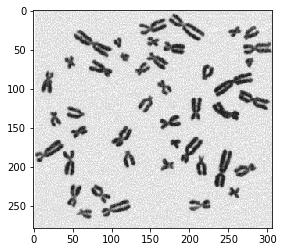

In [4]:
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

In [5]:
def grafica(ima1, ima2):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.imshow(ima1, cmap='gray', vmin=0, vmax=255)
    plt.subplot(1,2,2)
    plt.imshow(ima2, cmap='gray', vmin=0, vmax=255)
    plt.show()

### crear imagen binaria

In [6]:
_,imgB=cv2.threshold(img,125,255,cv2.THRESH_BINARY_INV)

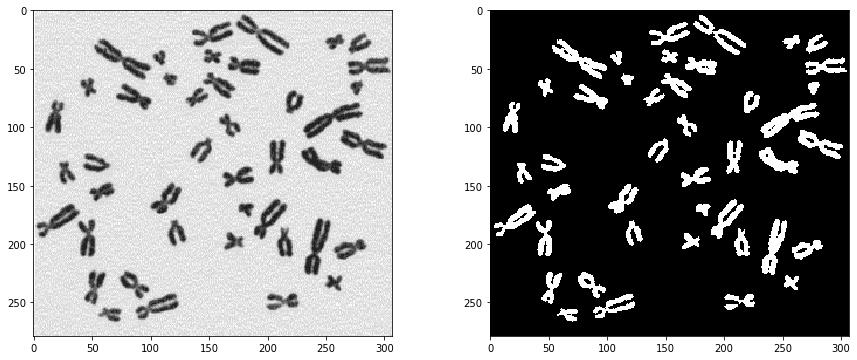

In [7]:
grafica(img,imgB)

### Filtrar

In [8]:
kernel = np.ones((3,3),np.uint8)
ima2 = cv2.dilate(imgB,kernel,iterations = 2)
ima2 = cv2.erode(ima2,kernel,iterations = 2)

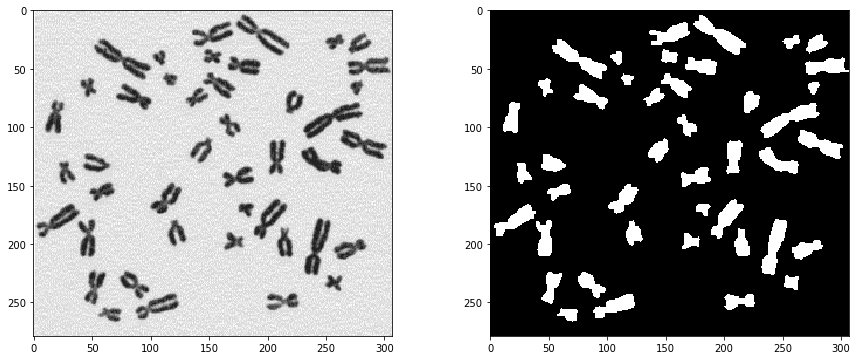

In [9]:
grafica(img,ima2)

### Etiquetado
El algoritmo de etiquetado parte de un concepto sencillo, en donde, todos los pixeles conectados espacialmente hacen parte de un mismo objeto y a ese objeto se le asigna una etiqueta diferente a cualquier otro elemento. El siguiente comando recibe una imagen binararia y retorna dos argumentos, el primero de ellos es el número de elementos u objetos encontrados contando el fondo de la imagen binaria y el segundo de ellos es una imagen con las etiquetas correspondientes para cada elemento.

In [10]:
elem,mask=cv2.connectedComponents(ima2)

In [11]:
print (elem)

44


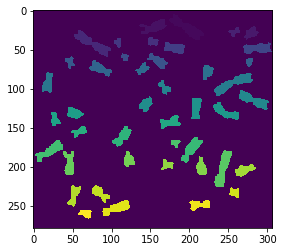

In [12]:
plt.imshow(mask)

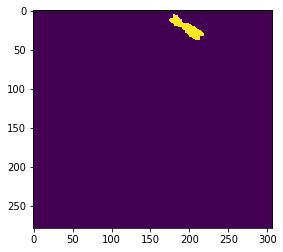

In [19]:
plt.imshow(mask==1 )

Area del elemento  561


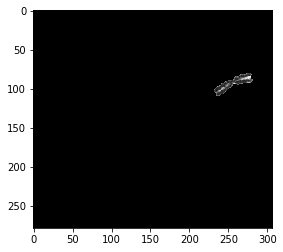

In [14]:
E=18
bol=mask==E
plt.imshow(img*(bol), cmap='gray')
print('Area del elemento ', np.sum(bol))

In [15]:
Tam=np.zeros(elem)
for i in range(elem):
    Tam[i]=np.sum(mask==i)
print ('Tamanhos de todos los elementos ', Tam)

Tamanhos de todos los elementos  [7.463e+04 5.300e+02 3.580e+02 1.790e+02 1.050e+02 5.250e+02 1.240e+02
 8.300e+01 2.810e+02 3.770e+02 7.300e+01 2.560e+02 1.160e+02 7.700e+01
 2.870e+02 1.480e+02 1.940e+02 2.690e+02 5.610e+02 1.640e+02 4.330e+02
 2.180e+02 2.980e+02 3.530e+02 2.160e+02 1.510e+02 2.670e+02 1.650e+02
 3.100e+02 3.910e+02 3.950e+02 9.200e+01 5.180e+02 3.160e+02 1.960e+02
 2.230e+02 1.360e+02 2.570e+02 2.580e+02 2.540e+02 1.190e+02 3.760e+02
 2.420e+02 1.320e+02]


#### Organizar de menor a mayor

In [16]:
Ind=np.argsort(Tam)

#### Graficar todos los elementos de manera individual

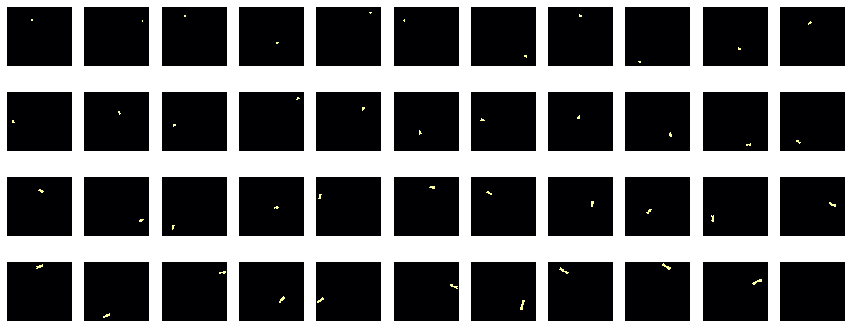

In [17]:
plt.figure(figsize=(15,6))
for i in range(elem):
    bol=mask==Ind[i]
    plt.subplot(4,11,i+1)
    plt.imshow(mask*bol, cmap='inferno')
    plt.axis('off')